In [1]:
import pandas as pd
digimon = pd.read_csv('C:/Users/traai/Data Science/Portfolio/4. Digimon Dataset/4. Digimon.csv')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import numpy as np

In [2]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [3]:
digimon = digimon.dropna()
digimon_train, digimon_test = train_test_split(digimon, test_size=0.3, random_state=42, stratify=digimon['Stage'])
print(digimon_train.shape, digimon_test.shape)

(174, 13) (75, 13)


In [4]:
features= ['Lv 50 HP', 'Lv50 Atk']
dt_classification = DecisionTreeClassifier(max_depth = 10)
dt_classification.fit(digimon_train[features], digimon_train['Stage'])

DecisionTreeClassifier(max_depth=10)

In [5]:
predictions = dt_classification.predict(digimon[features])
predictions

array(['Baby', 'Baby', 'Champion', 'Baby', 'In-Training', 'In-Training',
       'In-Training', 'In-Training', 'In-Training', 'In-Training',
       'In-Training', 'Rookie', 'In-Training', 'In-Training',
       'In-Training', 'In-Training', 'Rookie', 'Rookie', 'Rookie', 'Baby',
       'Rookie', 'Rookie', 'Rookie', 'Rookie', 'Rookie', 'Rookie',
       'Rookie', 'Rookie', 'Rookie', 'Rookie', 'Champion', 'Rookie',
       'Rookie', 'Rookie', 'Champion', 'Rookie', 'Rookie', 'Rookie',
       'Rookie', 'Rookie', 'Rookie', 'Champion', 'Rookie', 'Rookie',
       'Rookie', 'Rookie', 'Rookie', 'Champion', 'Rookie', 'Rookie',
       'Rookie', 'Mega', 'Champion', 'Rookie', 'Champion', 'Mega',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Champion', 'Champion', 'Champion', 'Champion',
       'Champion', 'Mega', 'Champion', 'Mega', 'Champion', 'Champion',
       'Rookie', 'Champion', 'Champion', 

In [6]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [7]:
predictionsOnTrainset = dt_classification.predict(digimon_train[features])
predictionsOnTestset = dt_classification.predict(digimon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, digimon_train.Stage)
accuracyTest = calculate_accuracy(predictionsOnTestset, digimon_test.Stage)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9425287356321839
Accuracy on test set 0.4266666666666667


In [8]:
### The accuracy is a little bit different

In [9]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

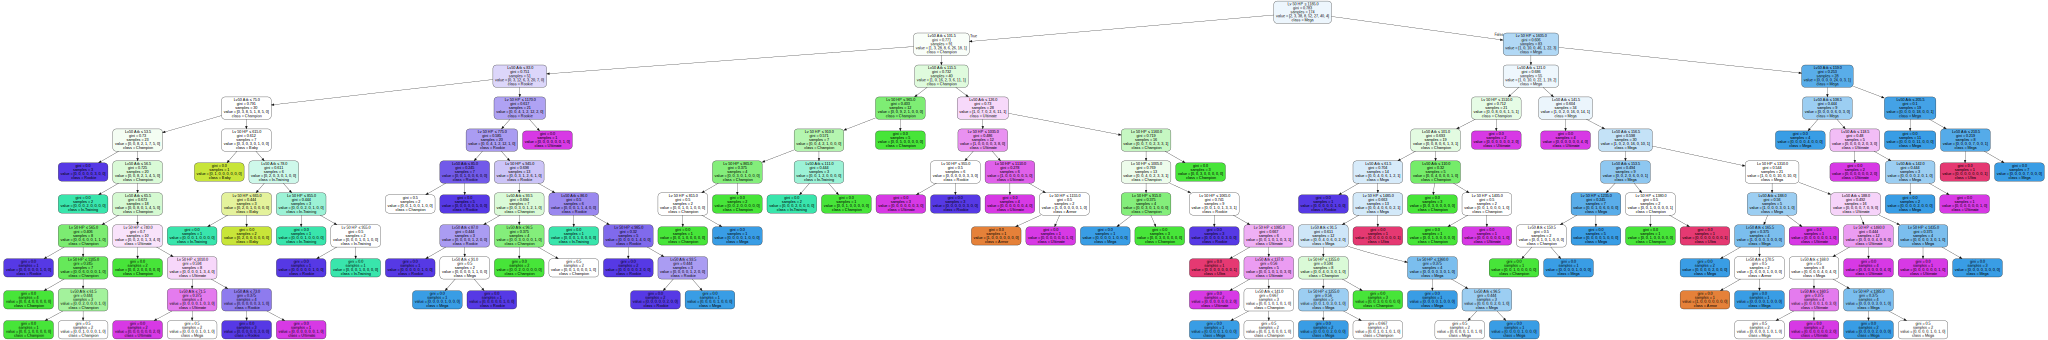

In [10]:
plot_tree_classification(dt_classification, features, np.sort(digimon.Stage.unique()))